# Project Proposal
#### Authors: Omer Tahir, Sam Zheng, Paul Huang, Longfei Guan
#### Group: 9

## Introduction
Begin by providing some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal.

Clearly state the question you will try to answer with your project. Your question should involve one or more random variables of interest, spread across two or more categories that are interesting to compare. For example, you could consider the annual maxima river flow at two different locations along a river, or perhaps gender diversity at different universities. Of the response variable, identify one location parameter (mean, median, quantile, etc.) and one scale parameter (standard deviation, inter-quartile range, etc.) that would be useful in answering your question. Justify your choices.

**UPDATE (Mar 1, 2022):** If it doesn’t make sense to infer a scale parameter, you can choose another parameter, or choose a second variable altogether. Ultimately, we’re looking for a comprehensive inference analysis on one parameter spread across 2+ groups (with at least one hypothesis test), plus a bit more (such as an investigation on the variance, a quantile, or a different variable). In total, you should use both bootstrapping and asymptotics somewhere in your report at least once each. Also, your hypothesis test(s) need not be significant: it is perfectly fine to write a report claiming no significant findings (i.e. your p-value is large).

Identify and describe the dataset that will be used to answer the question. Remember, this dataset is allowed to contain more variables than you need – feel free to drop them!

Also, be sure to frame your question/objectives in terms of what is already known in the literature. Be sure to include at least two scientific publications that can help frame your study (you will need to include these in the References section). We have no specific citation style requirements, but be consistent.

**** **Substance testing takes on many practical applications in modern society whether it be forensics, sports integrity, medicinal research (cite). Acts such as distinguishing and  determining presence of substances is undoubtedly an essential technique in improving society that draws upon many scientific disciplines namely chemistry and statistics. 
Acknowledging the complexity of existent modern techniques which can vary on context and application, this report aims to use statistical inference to differentiate two groups of wine - red and white. Evidently, in a real life scenario this would be as simple as a colour comparison; however, the goal is to prove potential differences in qualities can be statistically detected between similar substances. Understanding statically proven differences –treating existing data as a training set - is beneficial and subsequently be applied to distinguish substances in fields such as forensics.
The data sets which will be used for this report is ______________. It includes ____ quantitative variables including: ______________. Likewise, the our research question is:
Question: What qualities, if any, significantly differ between red and white wine?
** ****



## Preliminary Results

In this section, you will:

* Demonstrate that the dataset can be read from the web into R.
* Clean and wrangle your data into a tidy format.
* Plot the relevant raw data, tailoring your plot in a way that addresses your question.
* Compute estimates of the parameter you identified across your groups. Present this in a table. If relevant, include these estimates in your plot.

Be sure to not print output that takes up a lot of screen space.

### Loading relevant libraries

In [2]:
library(tidyverse)
library(infer)

### Reading & Wrangling the datasets from the web into R

In [3]:
url_1 <- "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
url_2 <- "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

redwine_data <- 
    read.csv(url_1, sep=';') |>
    mutate(type = "red")

whitewine_data <- 
    read.csv(url_2, sep=';') |>
    mutate(type = "white")

wine_data <-  
    rbind(redwine_data, whitewine_data) |> 
    select(type, fixed.acidity:quality) |>
    mutate(quality = as_factor(quality))

head(wine_data)

,type,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,red,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,red,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,red,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,red,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,red,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,red,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


### Exploratory Data Analysis

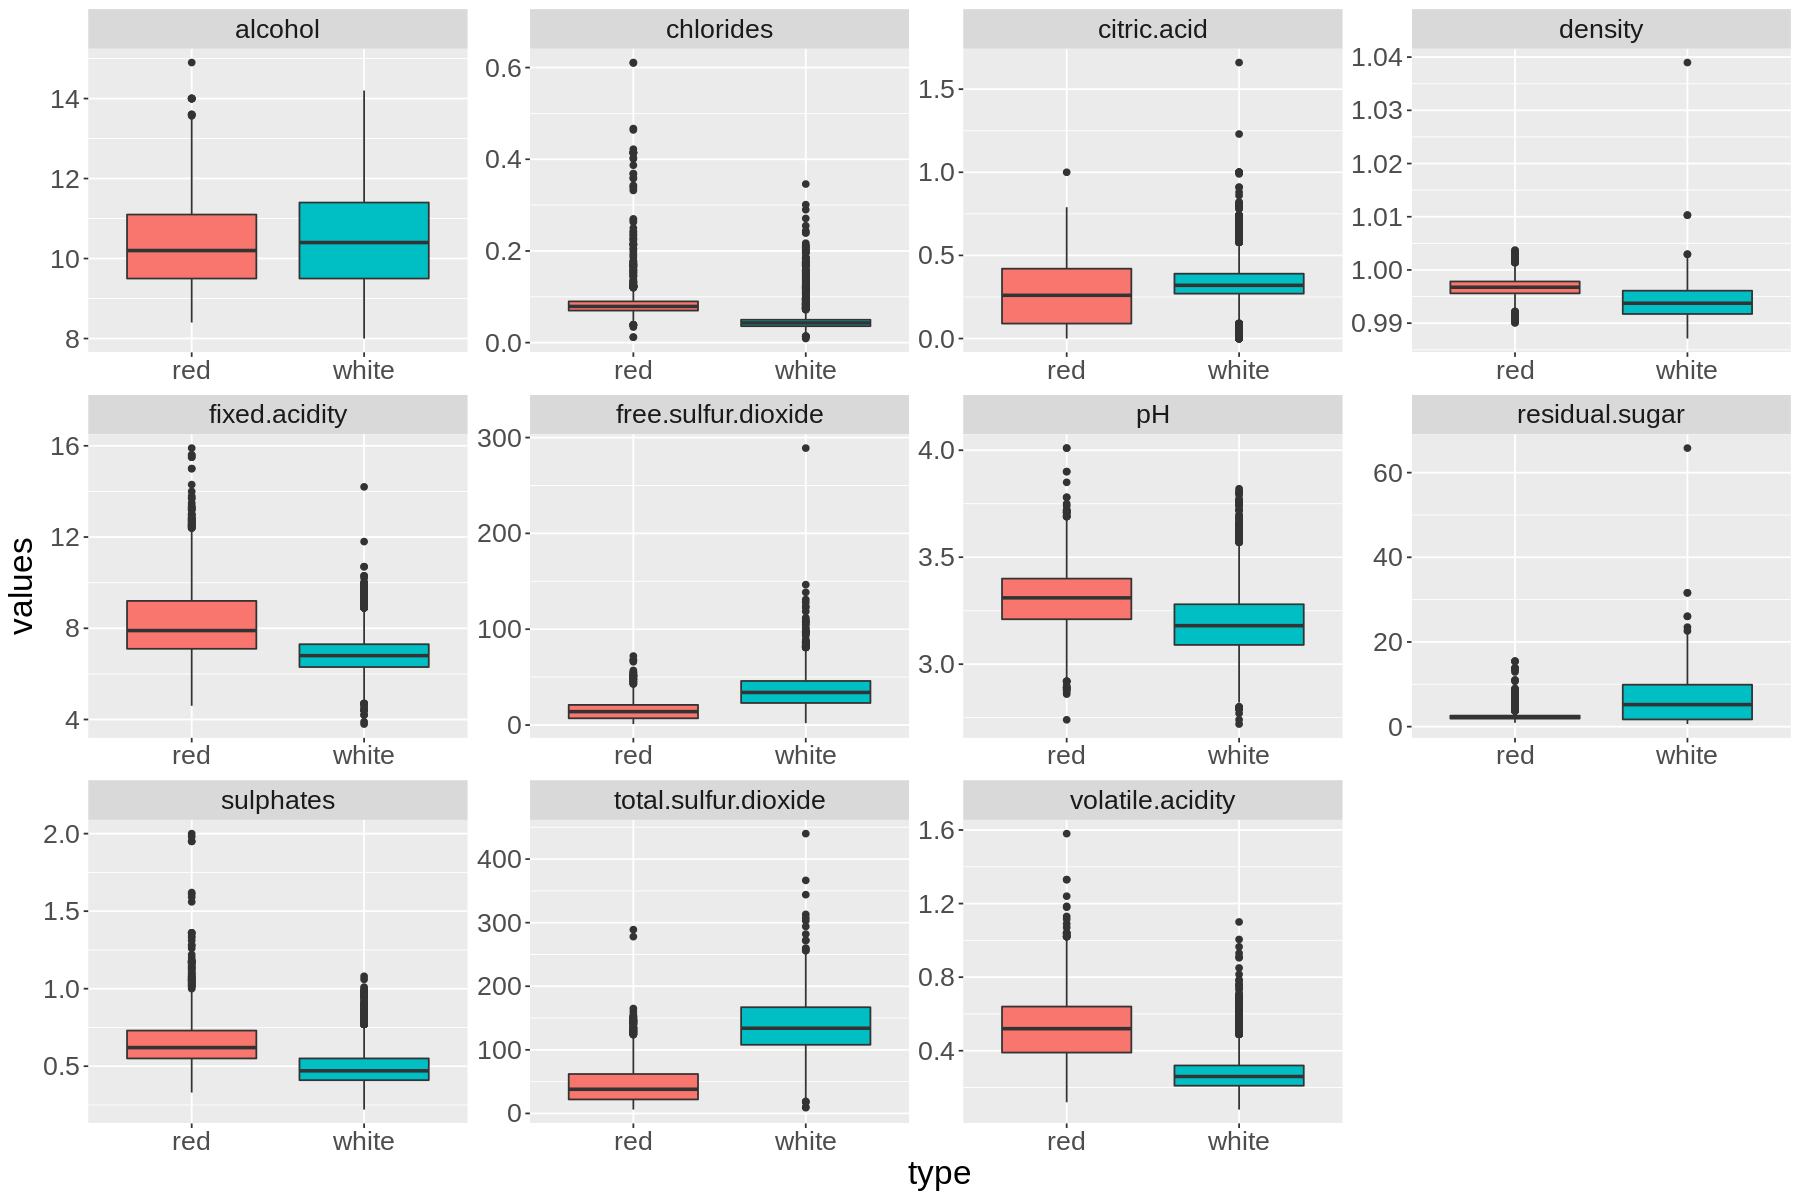

In [4]:
options(repr.plot.width = 15, repr.plot.height = 10)

wine_data |> 
    pivot_longer(cols = fixed.acidity:alcohol,
                names_to = "predictors",
                values_to = "values") |>
    ggplot() +
    geom_boxplot(aes(x = type, y = values, fill = type)) +
    facet_wrap(vars(predictors),
               scales = "free") +
    theme(legend.position = "none",
          text = element_text(size = 20))

## Methods: Plan

The previous sections will carry over to your final report (you’ll be allowed to improve them based on feedback you get). Begin this Methods section with a brief description of “the good things” about this report – specifically, in what ways is this report trustworthy?

Continue by explaining why the plot(s) and estimates that you produced are not enough to give to a stakeholder, and what you should provide in addition to address this gap. Make sure your plans include at least one hypothesis test and one confidence interval. If possible, compare both the bootstrapping and asymptotics methods.

Finish this section by reflecting on how your final report might play out:

* What do you expect to find?
* What impact could such findings have?
* What future questions could this lead to?

**** **Nowadays wine has become an indispensable part for many people. For a high-quality wine, it is important to control all factors which could cause negative effects during the production. Volatile acidity (VA) is one of the chemical produced during the production which has the smell and taste of vinegar. Usually, volatile acidity concentration of a wine is measured to make sure that the wine is within the appropriate legal limits. We aim to figure out the difference between the volatile acidity content in white wine and red wine. Our question is: does the volatile acid in red wine differ from the volatile acid in white wine?** ****

## References

At least two citations of literature relevant to the project. The citation format is your choice – just be consistent. Make sure to cite the source of your data as well.

**P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.**